In [1]:
print("test")

test


In [2]:
import pandas as pd
from pandas import DataFrame

In [3]:
data = pd.read_csv("dataset/chessData.csv")
data.head()

,FEN,Evaluation
0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,-10
1,rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBN...,+56
2,rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBN...,-9
3,rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPP2PPP/RNBQKB...,+52
4,rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPPN1PPP/R1BQK...,-26


In [4]:
len(data)

12958035

In [8]:
# Count how many entries contain the '#' symbol in the 'Evaluation' column
count_hashtags = data['Evaluation'].str.contains('#').sum()

# Display the count
print(f"Number of entries containing '#': {count_hashtags}")


Number of entries containing '#': 190154


### Since the it has around 200k entries where the evaultion is a string, we will just drop those rows. (we can impliment a way to encode this information later)

In [36]:
# Drop rows that contain the '#' symbol in the 'Evaluation' column
data_cleaned = data[~data['Evaluation'].str.contains('#')].copy()

# Convert the remaining values in the 'Evaluation' column to integers
data_cleaned.loc[:, 'Evaluation'] = data_cleaned['Evaluation'].astype(int)

# Display the first few rows of the cleaned dataframe
print(data_cleaned.head())


                                                 FEN Evaluation
0  rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...        -10
1  rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBN...         56
2  rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBN...         -9
3  rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPP2PPP/RNBQKB...         52
4  rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPPN1PPP/R1BQK...        -26


In [ ]:
!pip install matplotlib seaborn

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

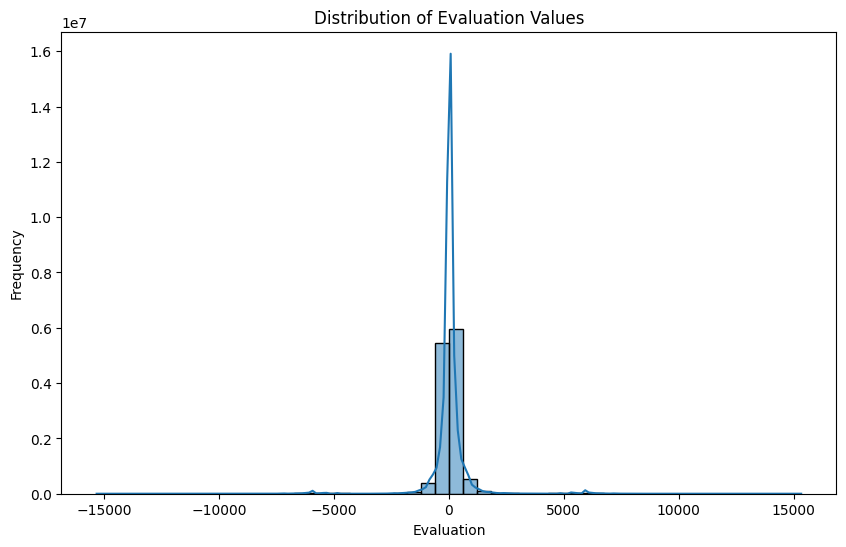

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Evaluation'], bins=50, kde=True)
plt.title('Distribution of Evaluation Values')
plt.xlabel('Evaluation')
plt.ylabel('Frequency')
plt.show()

In [22]:
print(data_cleaned.Evaluation.min())
print(data_cleaned.Evaluation.max())

-15312
15319


In [26]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 15.8 MB/s eta 0:00:000:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.4 MB/s eta 0:00:00m eta 0:00:010:00:01


In [29]:
## DID NOT WORK

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data_cleaned['Evaluation_normalized'] = scaler.fit_transform(data_cleaned[['Evaluation']])


In [38]:
# GOOD ENOUGH FOR NOW

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_cleaned['Evaluation_normalized'] = scaler.fit_transform(data_cleaned[['Evaluation']])


In [ ]:
## WILL LOOK INTO in the future

# import numpy as np

# data_cleaned['Evaluation_log'] = np.sign(data_cleaned['Evaluation']) * np.log1p(np.abs(data_cleaned['Evaluation']))


In [42]:
data_cleaned.head()

,FEN,Evaluation,Evaluation_normalized
0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,-10,-0.116279
1,rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBN...,56,0.190698
2,rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBN...,-9,-0.111628
3,rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPP2PPP/RNBQKB...,52,0.172093
4,rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPPN1PPP/R1BQK...,-26,-0.190698


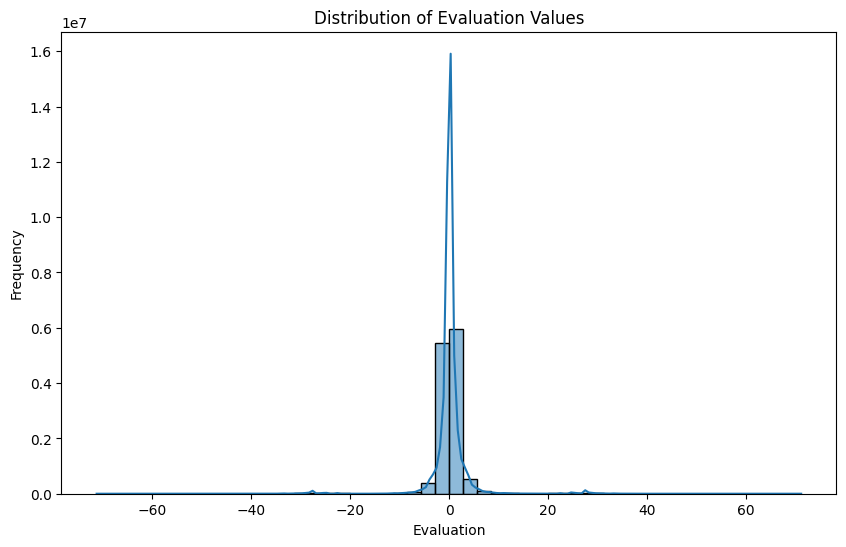

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Evaluation_normalized'], bins=50, kde=True)
plt.title('Distribution of Evaluation Values')
plt.xlabel('Evaluation')
plt.ylabel('Frequency')
plt.show()